In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
x = digits.data

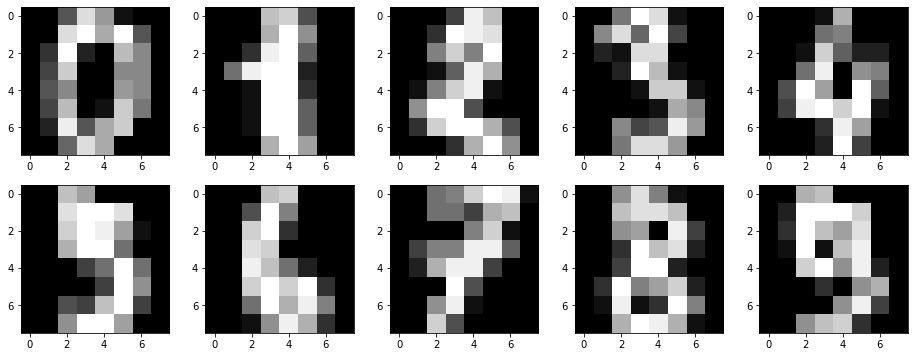

In [3]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x[i,:].reshape([8,8]), cmap='gray');

# Алгоритм K-Means

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x)
x_groups = kmeans.predict(x)

# Оценка

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
silhouette_score(x, x_groups)

0.18245400659765393

# Визуализация

In [8]:
from sklearn.manifold import TSNE

In [9]:
x_and_centers = np.append(x, kmeans.cluster_centers_, axis=0)

In [10]:
tsne = TSNE(n_components=2, random_state=42)
x_and_centers_tsne = tsne.fit_transform(x_and_centers)

In [11]:
x_tsne = x_and_centers_tsne[:-10, :]
centers_tsne = x_and_centers_tsne[-10:, :]

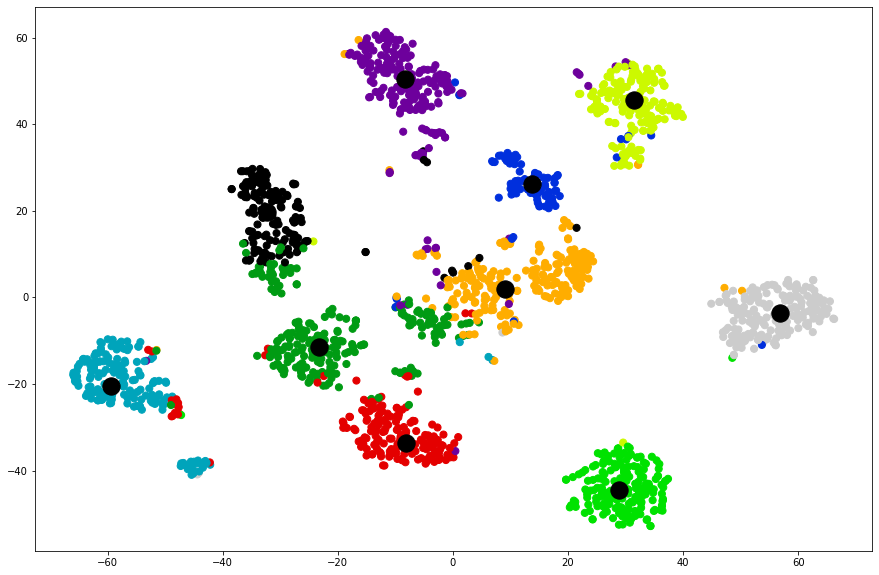

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=x_groups, s=50, cmap='nipy_spectral')
plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], s=300, c='black')
plt.show()

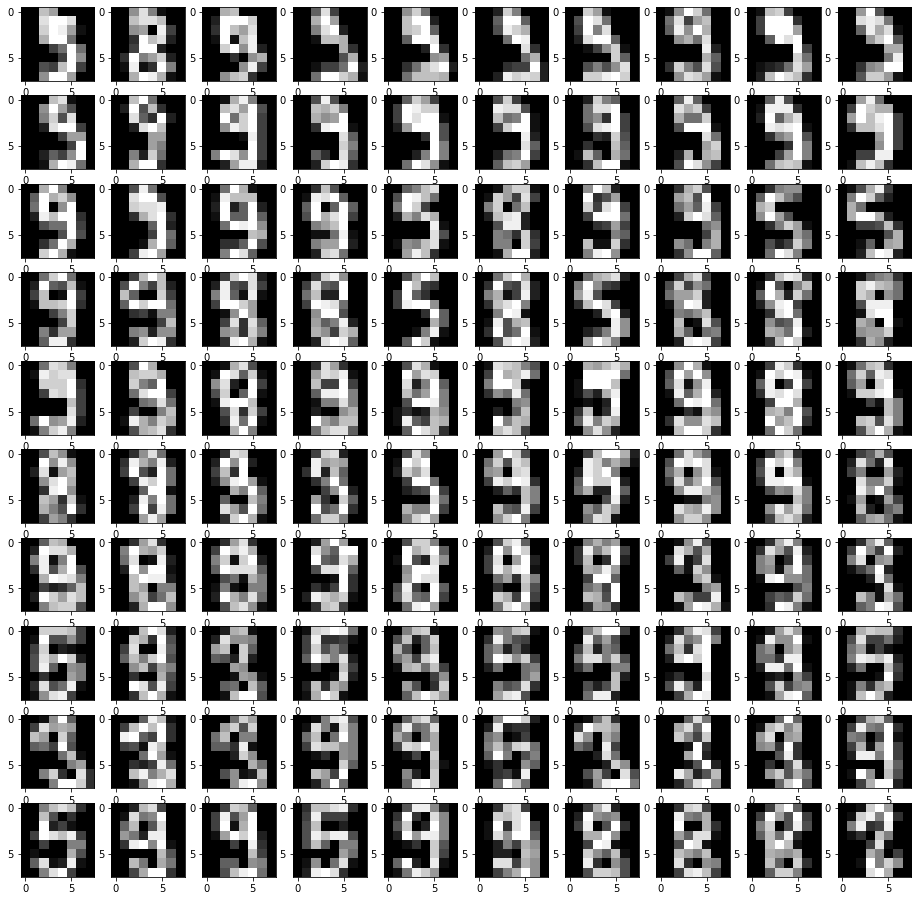

In [17]:
indxs = np.where(x_groups==4)[0]
plt.figure(figsize=(16, 16))
for i, indx in zip(range(100), indxs):
    plt.subplot(10, 10, i + 1)
    plt.imshow(x[indx,:].reshape([8,8]), cmap='gray');

In [18]:
len([i for i in indxs if digits.target[i] == 9]) / len(indxs)

0.5582329317269076